## Implement Linear Regression and calculate sum of residual error on the following Datasets.
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analytic formulation

In [11]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
x1=np.mean(x)
print("Mean of x is",x1)
y1=np.mean(y)
print("Mean of y is",y1)
x2_array = np.empty(len(x))
for i in range(len(x)):
    x2=x[i]-x1
    x2_array[i] = x2

y2_array = np.empty(len(x))
for i in range(len(x)):
    y2=y[i]-y1
    y2_array[i] = y2 

numerator=np.multiply(x2_array,y2_array)

denominator=(x2_array**2)

data = {
    'x': x,
    'y': y,
    '(xi - mean(X))': x2_array,
    '(yi - mean(Y))': y2_array,
    '((xi - mean(X)*(yi - mean(Y))': numerator,
    '(xi - mean(X)^2': denominator
}

df = pd.DataFrame(data)

print(df.to_string(index=False))

num_sum=np.sum(numerator)
print(num_sum)
deno_sum=np.sum(denominator)
print(deno_sum)
m=num_sum/deno_sum
print(m)
betanot = (y1-m*x1)
print(betanot)

print('The Best-Fit Line equation (y)=',(betanot),'+',m,'x')


Mean of x is 4.5
Mean of y is 6.5
 x  y  (xi - mean(X))  (yi - mean(Y))  ((xi - mean(X)*(yi - mean(Y))  (xi - mean(X)^2
 0  1            -4.5            -5.5                          24.75            20.25
 1  3            -3.5            -3.5                          12.25            12.25
 2  2            -2.5            -4.5                          11.25             6.25
 3  5            -1.5            -1.5                           2.25             2.25
 4  7            -0.5             0.5                          -0.25             0.25
 5  8             0.5             1.5                           0.75             0.25
 6  8             1.5             1.5                           2.25             2.25
 7  9             2.5             2.5                           6.25             6.25
 8 10             3.5             3.5                          12.25            12.25
 9 12             4.5             5.5                          24.75            20.25
96.5
82.5
1.16969696

## R^2 value.

[ 1.23636364  2.40606061  3.57575758  4.74545455  5.91515152  7.08484848
  8.25454545  9.42424242 10.59393939 11.76363636]
[-0.23636364  0.59393939 -1.57575758  0.25454545  1.08484848  0.91515152
 -0.25454545 -0.42424242 -0.59393939  0.23636364]
5.624242424242423
30.25
0.8140746306035562


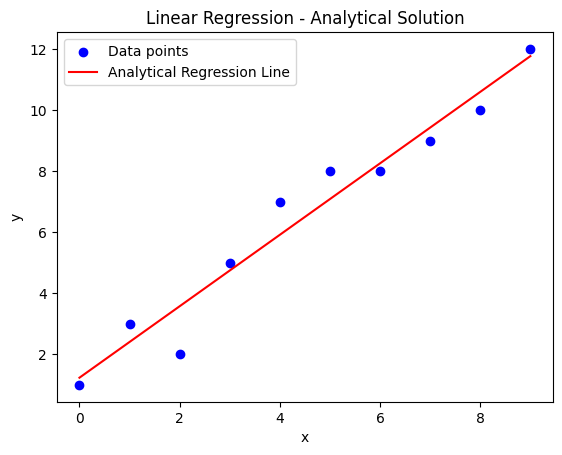

In [12]:
prep= ((m*x)+(betanot))
print(prep)
pp=(y-prep)
print(pp)
rnum=np.sum(pp**2)
print(rnum)
rdem = np.sum(y2**2)
print(rdem)
rsquare = 1-(rnum/rdem)
print(rsquare)
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, prep, color='red', label='Analytical Regression Line')
plt.title('Linear Regression - Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Full-batch Gradient Descent:
Coefficients (beta): [1.23280995 1.17026369]
Sum Squared Error (SSE): 5.624279406496133
R-squared value: 0.9525377265274588

Stochastic Gradient Descent:
Coefficients (beta): [1.23663575 1.17072961]
Sum Squared Error (SSE): 5.624572365218323
R-squared value: 0.9525352543019551


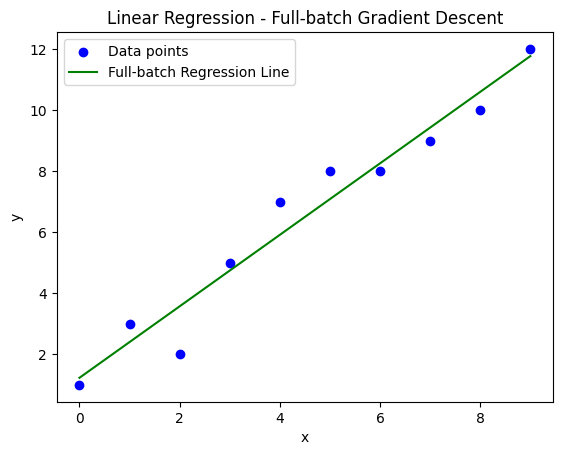

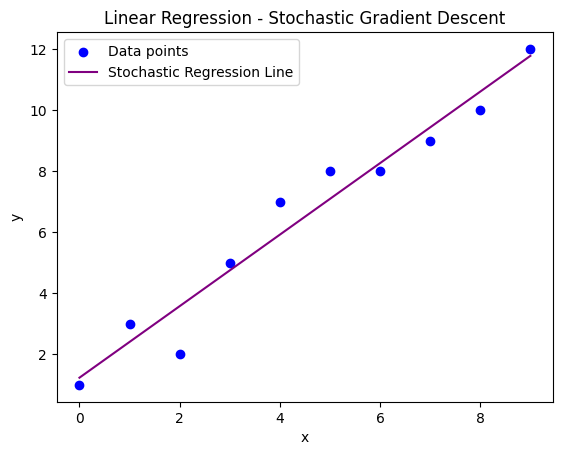

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

def linear_regression_analytical(x, y):
    X = np.vstack([np.ones(len(x)), x]).T
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return beta

beta_analytical = linear_regression_analytical(x, y)
y_pred_analytical = beta_analytical[0] + beta_analytical[1] * x
sse_analytical = np.sum((y - y_pred_analytical)**2)
y_mean = np.mean(y)
sst = np.sum((y - y_mean)**2)
r_squared_analytical = 1 - (sse_analytical / sst)



def full_batch_gradient_descent(x, y, learning_rate=0.001, epochs=1000, tolerance=1e-5):
    beta = np.zeros(2)
    m = len(x)
    
    for epoch in range(epochs):
        y_pred = beta[0] + beta[1] * x
        gradient = np.array([
            -2 * np.sum(y - y_pred),
            -2 * np.sum((y - y_pred) * x)
        ])
        beta -= learning_rate * gradient
        sse = np.sum((y - y_pred)**2)
        if np.linalg.norm(gradient) < tolerance:
            break
    
    return beta, sse

def stochastic_gradient_descent(x, y, learning_rate=0.001, epochs=1000, tolerance=1e-5):
    beta = np.zeros(2)
    m = len(x)
    
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        for i in range(m):
            y_pred = beta[0] + beta[1] * x_shuffled[i]
            gradient = np.array([
                -2 * (y_shuffled[i] - y_pred),
                -2 * (y_shuffled[i] - y_pred) * x_shuffled[i]
            ])
            beta -= learning_rate * gradient
            sse = np.sum((y - (beta[0] + beta[1] * x))**2)
            if np.linalg.norm(gradient) < tolerance:
                return beta, sse
    
    return beta, sse

beta_full_batch, sse_full_batch = full_batch_gradient_descent(x, y)
y_pred_full_batch = beta_full_batch[0] + beta_full_batch[1] * x
r_squared_full_batch = 1 - (sse_full_batch / sst)

beta_stochastic, sse_stochastic = stochastic_gradient_descent(x, y)
y_pred_stochastic = beta_stochastic[0] + beta_stochastic[1] * x
r_squared_stochastic = 1 - (sse_stochastic / sst)

print("\nFull-batch Gradient Descent:")
print("Coefficients (beta):", beta_full_batch)
print("Sum Squared Error (SSE):", sse_full_batch)
print("R-squared value:", r_squared_full_batch)

print("\nStochastic Gradient Descent:")
print("Coefficients (beta):", beta_stochastic)
print("Sum Squared Error (SSE):", sse_stochastic)
print("R-squared value:", r_squared_stochastic)

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred_full_batch, color='green', label='Full-batch Regression Line')
plt.title('Linear Regression - Full-batch Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred_stochastic, color='purple', label='Stochastic Regression Line')
plt.title('Linear Regression - Stochastic Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Download Boston Housing Rate Dataset. Analyse the input attributes and find out the attribute that best follow the linear relationship with the output price. Implement both the analytic formulation and gradient descent (Full-batch, stochastic) on LMS loss formulation to compute the coefficients of regression matrix and compare the results.

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler`

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO

# Step 1: Load the Boston Housing dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
response = requests.get(url)
data = response.text

# Parse the data into a pandas DataFrame
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv(StringIO(data), delim_whitespace=True, names=names)

# Extract features and target variable
X = df.drop(columns=['MEDV']).values
y = df['MEDV'].values

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocess the data (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Compute correlation coefficients
correlation_coefficients = np.abs(np.corrcoef(X_train_scaled.T, y_train)[0, 1:])

# Step 5: Find the attribute with the highest correlation coefficient
best_attribute_index = np.argmax(correlation_coefficients)
best_attribute_name = names[best_attribute_index]
print("Attribute with the highest correlation with price:", best_attribute_name)

# Step 6: Implement analytic formulation and gradient descent
# Analytic solution
X_train_with_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
analytic_solution = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)

# Full-batch gradient descent
def full_batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Stochastic gradient descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])
    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Compute coefficients using full-batch gradient descent
theta_full_batch = full_batch_gradient_descent(X_train_with_bias, y_train)


# Compute coefficients using stochastic gradient descent
theta_stochastic = stochastic_gradient_descent(X_train_with_bias, y_train)

# Step 7: Compare the results
print("Analytic solution coefficients:", analytic_solution)

Attribute with the highest correlation with price: DIS
Analytic solution coefficients: [22.79653465 -1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194
  3.14523956 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151
  1.12956831 -3.61165842]


In [3]:
print("Full-batch gradient descent coefficients:", theta_full_batch)

Full-batch gradient descent coefficients: [22.79653461 -0.95602258  0.59958751  0.10007796  0.7457982  -1.96512162
  3.19955979 -0.20186422 -3.03656474  1.70010494 -1.17247002 -2.01017978
  1.12799268 -3.58191713]


In [15]:
print("Stochastic gradient descent coefficients:", theta_stochastic)

Stochastic gradient descent coefficients: [23.66624452 -1.34669381  1.07269388  0.05559806  1.33783614 -1.93653535
  2.29839263  0.27641418 -4.83064249  4.29737608 -0.72438677 -1.58571696
  1.18741798 -4.92829713]
